In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
#Lineer olanlar
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
#Lineer olmayanlar
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [6]:
df=pd.read_csv("Clean_Dataset.csv")

In [7]:
df.head(3)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [8]:
df=df.drop(["Unnamed: 0"],axis=1)

In [9]:
df.tail(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [10]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
df.duplicated().sum() #birbirini tekrar eden sütunlar var mı diye kontrol etttim

0

In [12]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [13]:
#df=df.rename(columns={"airline ":"Havaalanı"})

In [14]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [16]:
df["days_left"].value_counts()

days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64

In [17]:
df["duration"].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

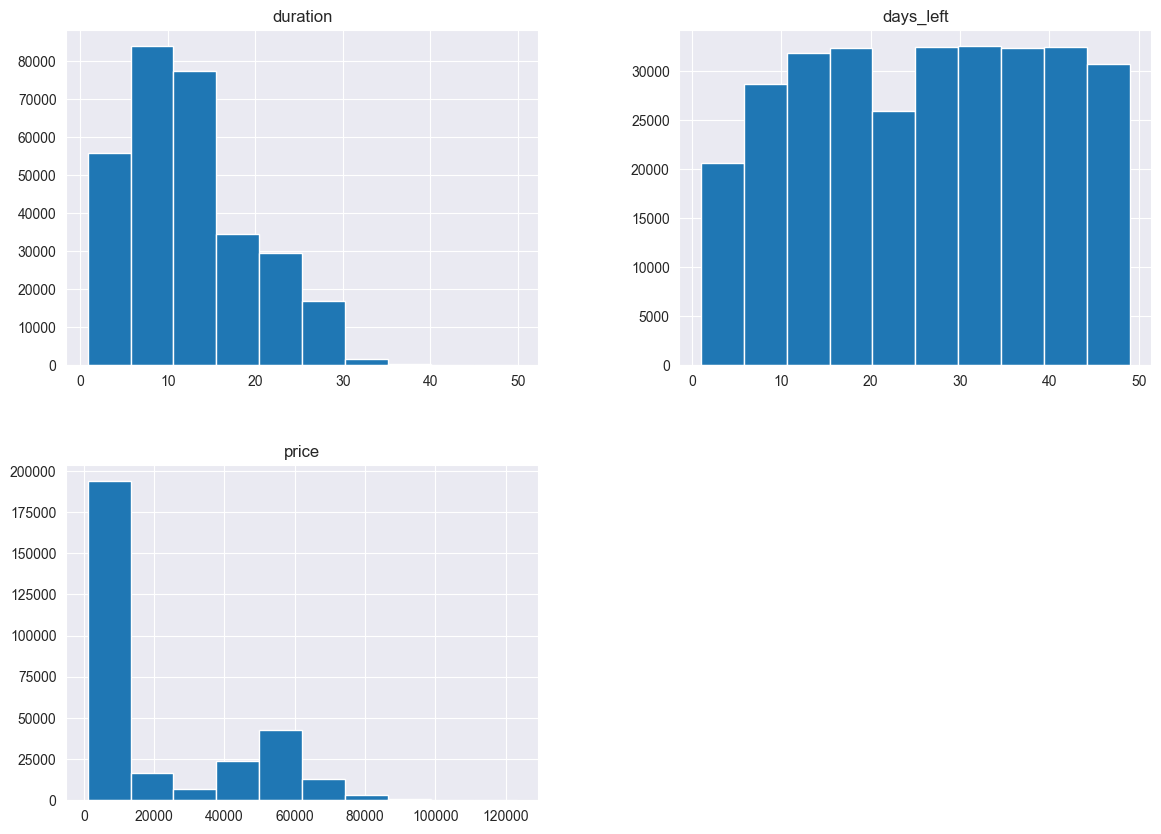

In [18]:
df.hist(bins=10,figsize=(14,10))
plt.show();

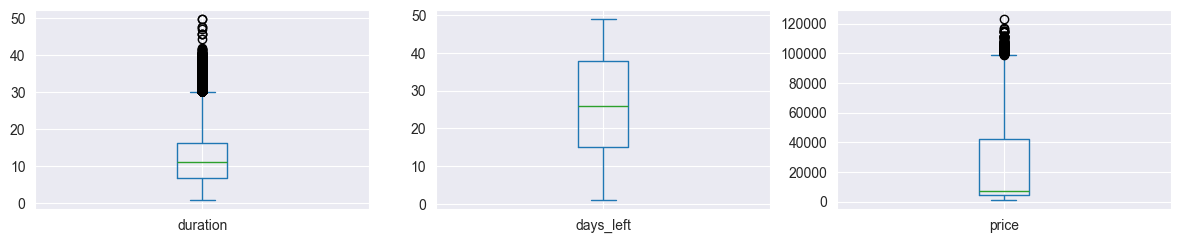

In [19]:
df.plot(kind ="box",subplots=True,figsize=(25,15),layout=(5,5));

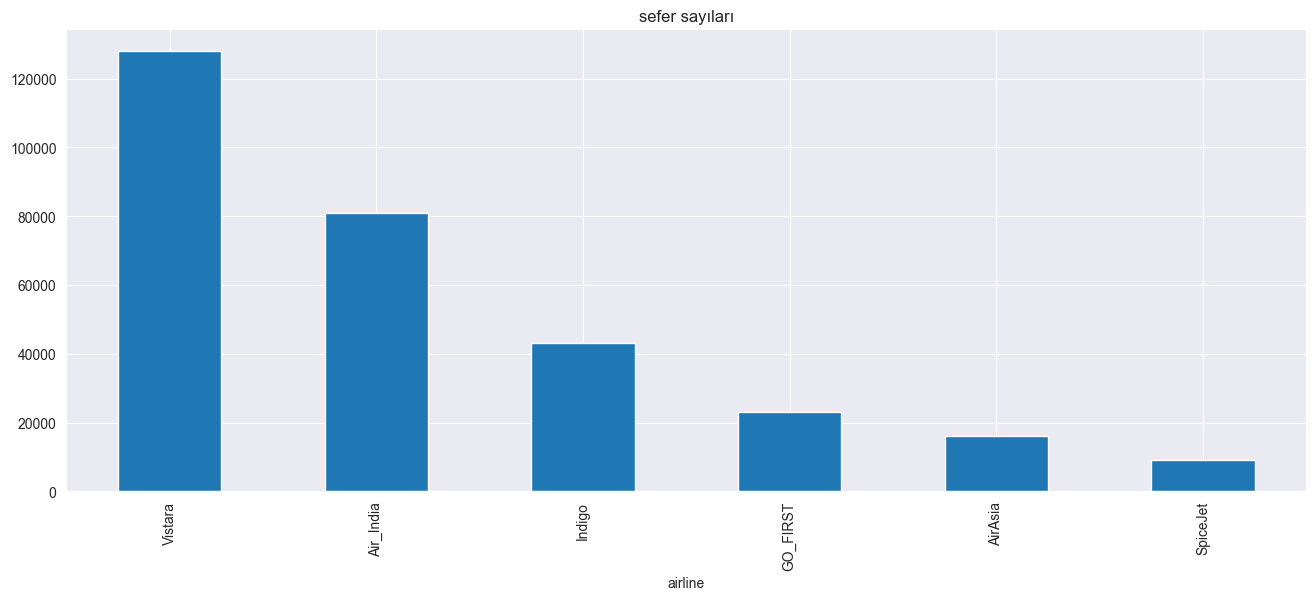

In [20]:
plt.figure(figsize=(16,6))
plt.title("sefer sayıları")
df["airline"].value_counts().plot(kind ="bar");

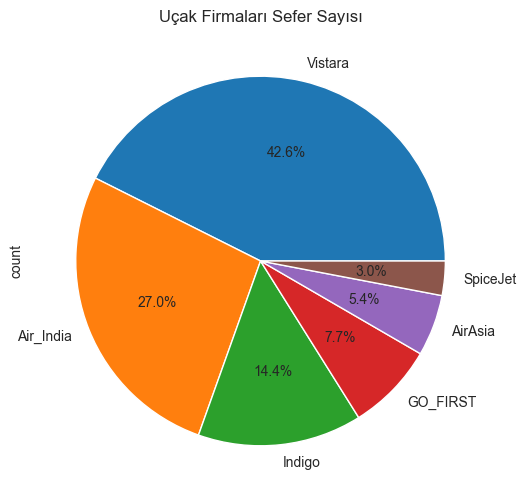

In [21]:
plt.figure(figsize=(16,6))
plt.title("Uçak Firmaları Sefer Sayısı")
df["airline"].value_counts().plot(kind ="pie",autopct='%1.1f%%');

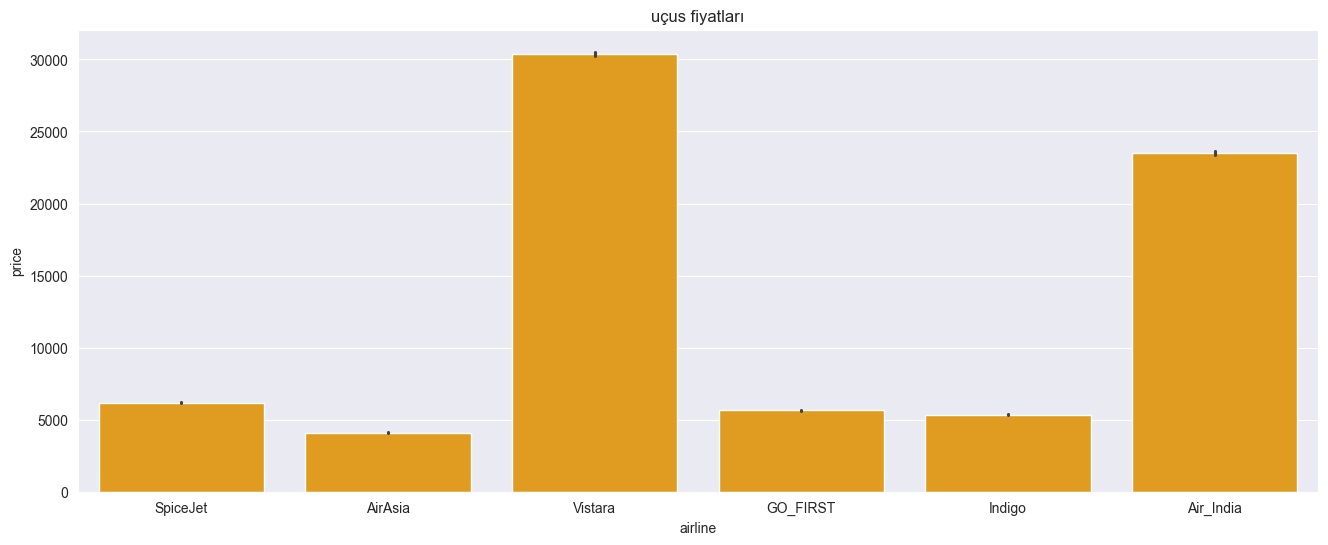

In [22]:
plt.figure(figsize=(16,6))
plt.title("uçus fiyatları")
sns.barplot(x="airline", y="price",color="Orange",data=df);
plt.show()

In [23]:
top=df["airline"].value_counts()

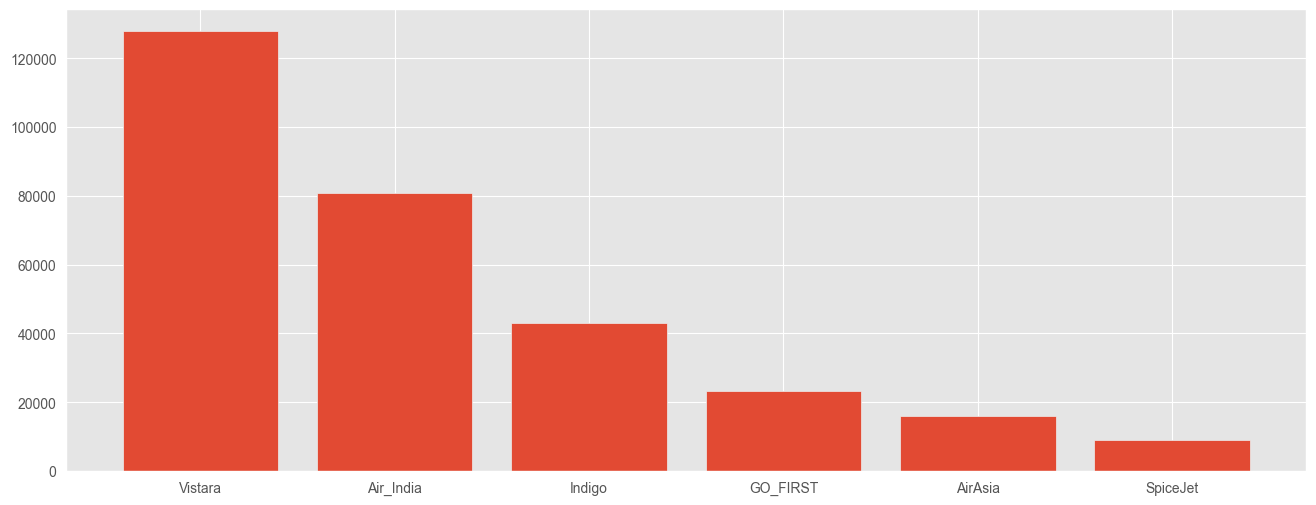

In [24]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(top.index,top.values)
plt.show()

In [25]:
numeric_df = df.select_dtypes(include=['number'])

In [26]:
df.tail(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [27]:
a=list()
for i in range(300153):
    a.append(df["airline"][i])

In [28]:
hedef1={"hedef1":a}

In [29]:
hedef1=pd.DataFrame(hedef1)

In [30]:
hedef1

,hedef1
0,SpiceJet
1,SpiceJet
2,AirAsia
3,Vistara
4,Vistara
...,...
300148,Vistara
300149,Vistara
300150,Vistara
300151,Vistara


In [31]:
numeric_df["airline"]=hedef1

In [32]:
numeric_df

,duration,days_left,price,airline
0,2.17,1,5953,SpiceJet
1,2.33,1,5953,SpiceJet
2,2.17,1,5956,AirAsia
3,2.25,1,5955,Vistara
4,2.33,1,5955,Vistara
...,...,...,...,...
300148,10.08,49,69265,Vistara
300149,10.42,49,77105,Vistara
300150,13.83,49,79099,Vistara
300151,10.00,49,81585,Vistara


In [33]:
air_mean=numeric_df.groupby(by="airline").mean()

In [34]:
air_mean

,duration,days_left,price
airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


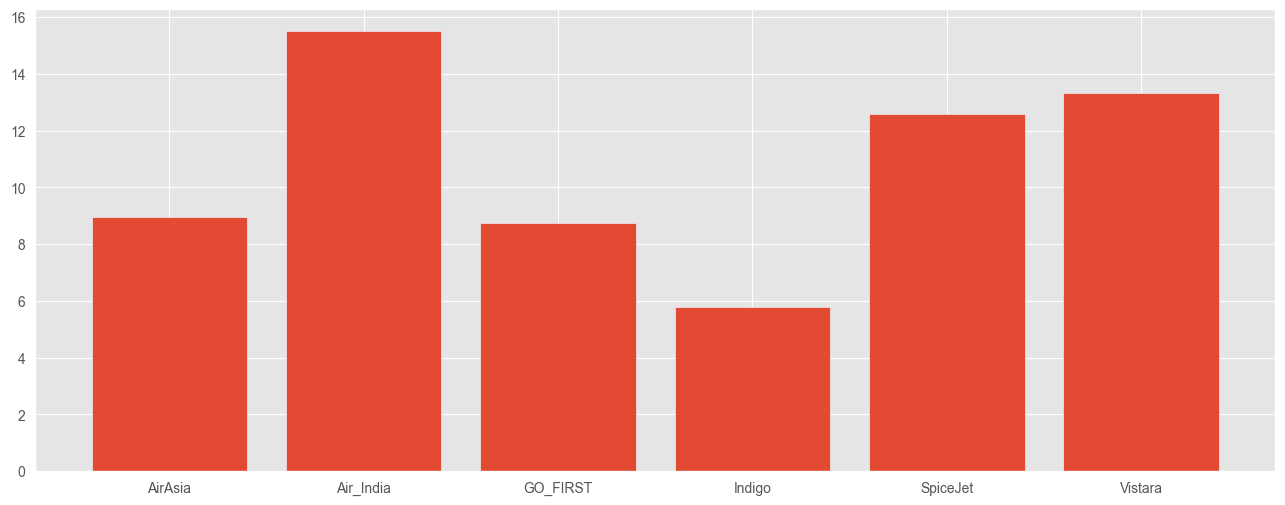

In [35]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(air_mean.index,air_mean["duration"])
plt.show()

In [36]:
city=df["source_city"].value_counts()

In [37]:
city

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

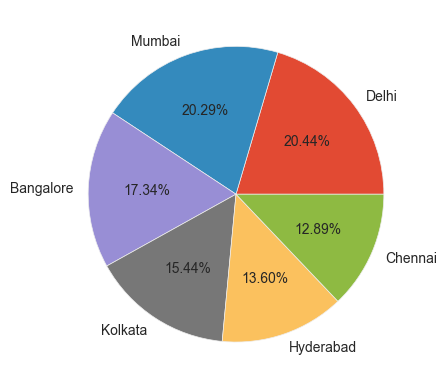

In [38]:
plt.pie(city.values,labels=city.index,autopct="%1.2f%%")
plt.show()

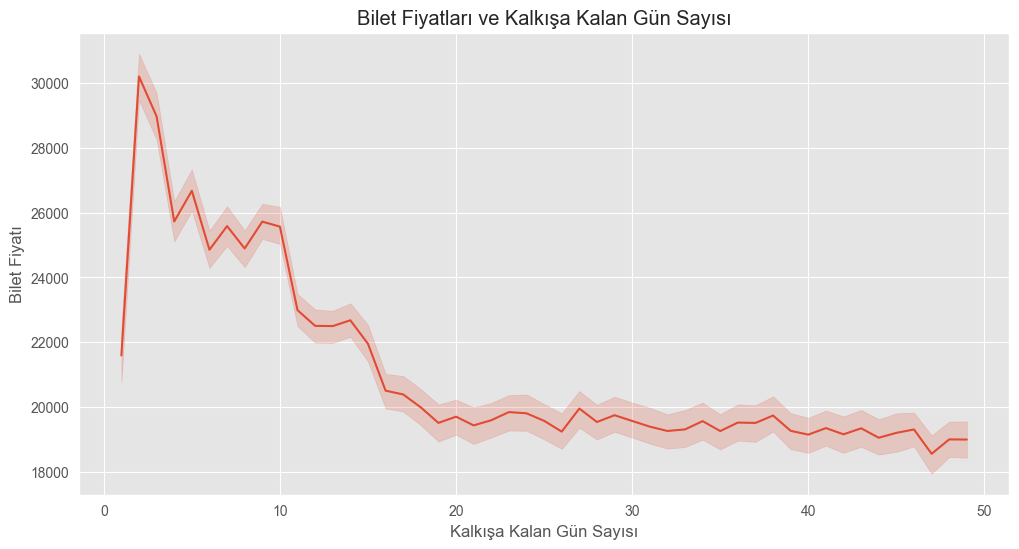

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', data=df)
plt.title('Bilet Fiyatları ve Kalkışa Kalan Gün Sayısı')
plt.xlabel('Kalkışa Kalan Gün Sayısı')
plt.ylabel('Bilet Fiyatı')
plt.show()

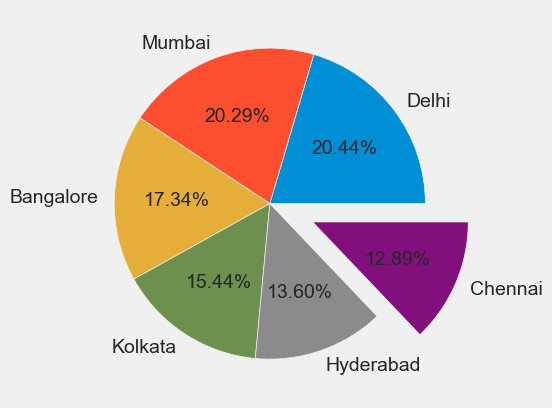

In [40]:
plt.style.use("fivethirtyeight")
plt.pie(city.values,labels=city.index,autopct="%1.2f%%",explode=[0,0,0,0,0,0.3])
plt.show()

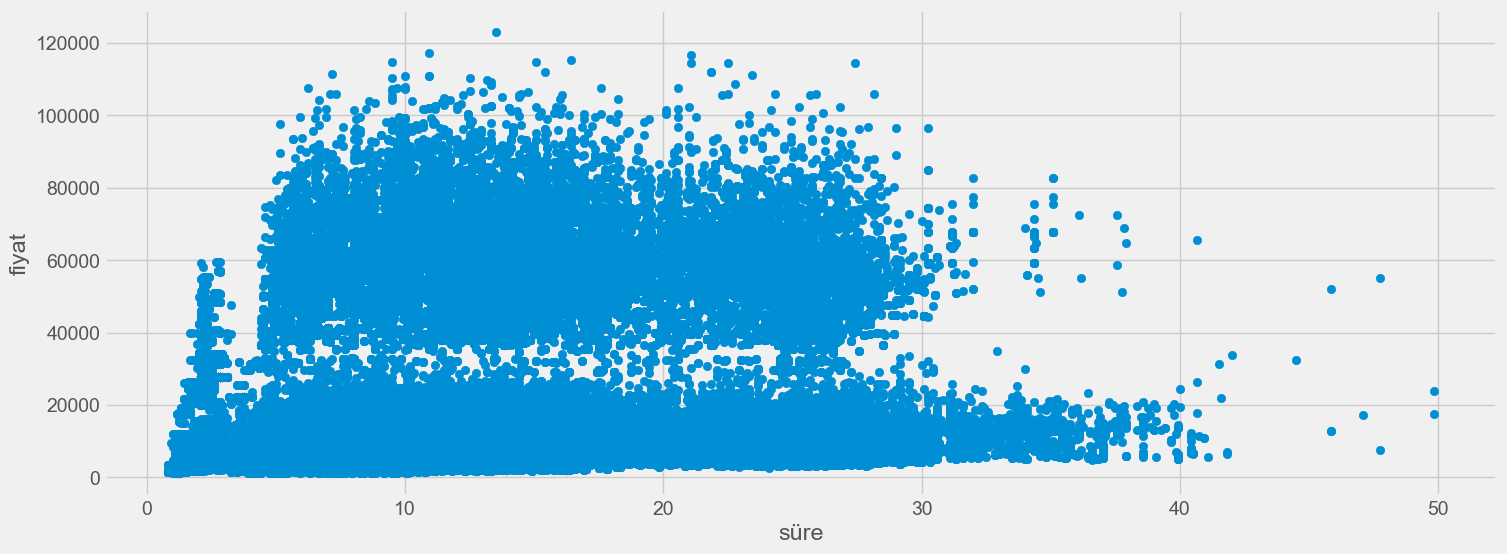

In [41]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,6))
plt.scatter(df["duration"],df["price"])
plt.xlabel("süre")
plt.ylabel("fiyat")
plt.show()

In [42]:
df=df.drop(["flight"],axis=1)

In [43]:
df["duration"]=df["duration"].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int32 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int32(1), int64(2), object(7)
memory usage: 21.8+ MB


In [45]:
df=pd.get_dummies(df,columns=["airline","source_city","departure_time","stops","arrival_time","destination_city","class"],drop_first=True)

In [67]:
df = df.astype(int)

In [68]:
df.corr()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
duration,1.000000,-0.039206,0.205079,0.276124,-0.139994,-0.365838,0.008352,0.134154,0.032869,-0.048764,...,0.033605,-0.107231,0.121964,-0.064201,0.060798,-0.114467,0.066452,0.061827,-0.044618,-0.139375
days_left,-0.039206,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,...,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337,0.013039
price,0.205079,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,...,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533,-0.937860
airline_Air_India,0.276124,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,...,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490,-0.124899
airline_GO_FIRST,-0.139994,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,...,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916,0.194540
airline_Indigo,-0.365838,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,...,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242,0.275477
airline_SpiceJet,0.008352,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,...,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058,0.118325
airline_Vistara,0.134154,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,...,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810,-0.302116
source_city_Chennai,0.032869,0.002581,0.018742,-0.011600,-0.063273,0.033626,0.003331,0.031174,1.000000,-0.194991,...,0.016559,0.009136,-0.024027,0.004418,-0.151660,0.060364,0.016905,0.015972,0.042960,-0.010204
source_city_Delhi,-0.048764,-0.001292,-0.043282,0.009886,0.030585,-0.012615,0.033040,-0.046163,-0.194991,1.000000,...,-0.025908,-0.028147,0.003773,-0.007427,0.061265,-0.246344,0.014093,0.040300,0.066721,0.014098


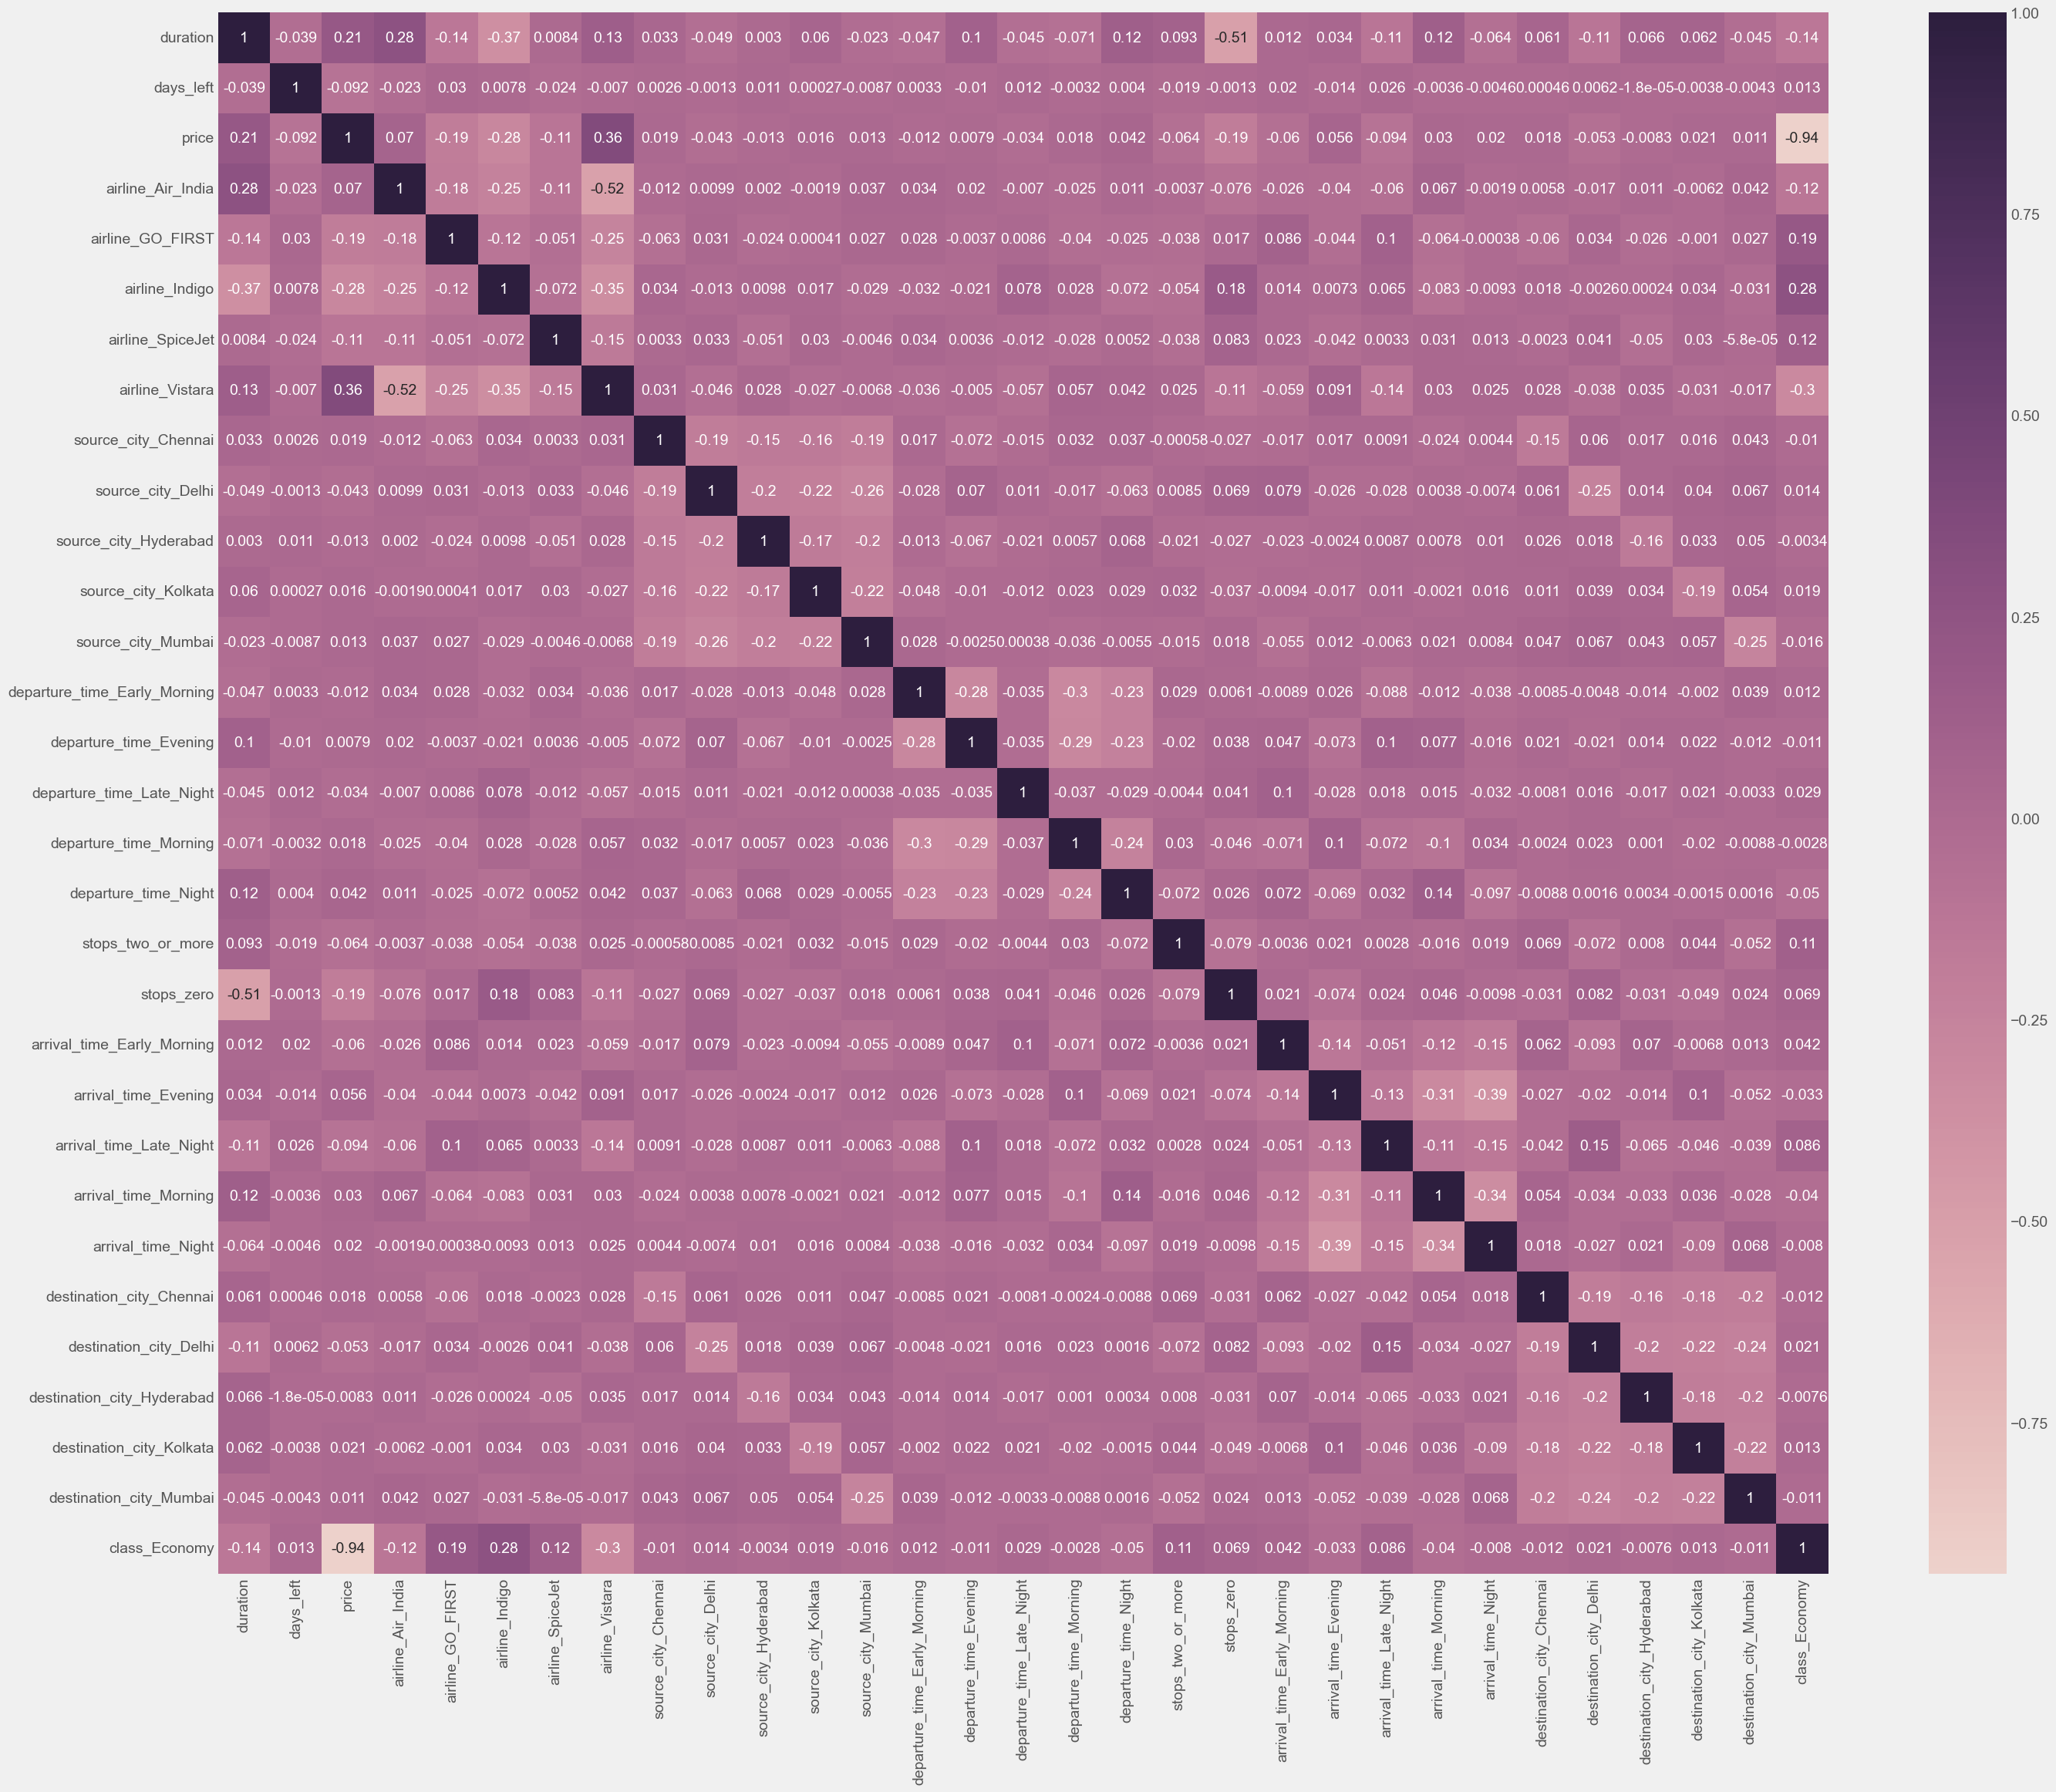

In [69]:
plt.figure(figsize=(30,25)) 
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(as_cmap=True), annot=True);

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   duration                      300153 non-null  int32
 1   days_left                     300153 non-null  int32
 2   price                         300153 non-null  int32
 3   airline_Air_India             300153 non-null  int32
 4   airline_GO_FIRST              300153 non-null  int32
 5   airline_Indigo                300153 non-null  int32
 6   airline_SpiceJet              300153 non-null  int32
 7   airline_Vistara               300153 non-null  int32
 8   source_city_Chennai           300153 non-null  int32
 9   source_city_Delhi             300153 non-null  int32
 10  source_city_Hyderabad         300153 non-null  int32
 11  source_city_Kolkata           300153 non-null  int32
 12  source_city_Mumbai            300153 non-null  int32
 13  departure_time

In [71]:
x=df.drop("price",axis=1)
y=df["price"]

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=25,train_size=0.80)

In [73]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [74]:
model.score(x_test,y_test)

0.9107968015609899

In [75]:
x_train

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
154862,5,22,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
253148,8,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
270966,18,17,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
143014,2,7,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
54524,13,12,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130365,6,20,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
92303,2,41,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
6618,2,34,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
90430,8,33,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [76]:
def linear_regression_PI(x, y):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    x = x.astype(int)
    w = (np.linalg.inv(x.T @ x) @ x.T) @ y

    return w

def predict(x, w):
     x = np.hstack((np.ones((x.shape[0], 1)), x))

     return x @ w

In [77]:
X_train, X_test, y_train, y_test = \
    train_test_split(x, y, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], df.shape[0])
)

train size=240122, test_size=60031, total_size=300153


In [78]:
X_train

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
148417,19,6,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
36879,7,13,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
274531,21,44,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
166397,10,11,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
272722,26,5,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,20,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
259178,25,7,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
131932,13,29,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
146867,8,39,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [79]:
y_train

148417    13524
36879      9940
274531    55983
166397     7927
272722    55502
          ...  
119879    22869
259178    44280
131932     5102
146867     5574
121958     6339
Name: price, Length: 240122, dtype: int32

In [80]:
columns = df.columns
columns

Index(['duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'class_Economy'],
      dtype='object')

In [81]:
for coluna in columns:
    df[coluna] = df[coluna
                    ].astype(int)


In [82]:
w = linear_regression_PI(X_train, y_train)

In [83]:
w

array([ 5.25860345e+04,  4.41833539e+01, -1.30428330e+02,  1.06038358e+02,
        1.69161571e+03,  2.12553616e+03,  2.29749023e+03,  4.06234678e+03,
       -7.65788138e+01, -1.41394462e+03, -1.67640353e+03,  1.59466050e+03,
       -2.08146336e+02,  8.09730428e+02,  7.34017394e+02,  1.54165771e+03,
        8.66675082e+02,  6.58833604e+02,  2.10268751e+03, -7.60065444e+03,
       -7.71387646e+02,  9.22609282e+02,  9.67994613e+02,  4.60058333e+02,
        1.13539841e+03, -2.40545388e+02, -1.56387798e+03, -1.71422596e+03,
        1.35612185e+03, -3.26828897e+01, -4.49295609e+04])

In [84]:
y_pred_PI = predict(X_test, w)
y_pred_PI

array([ 3422.32709263, 55132.09268333, 10409.82632715, ...,
        4953.62756649, -1611.06622628, 57515.45531987])

In [85]:
print("Linear regression r2 score com numpy: ", r2_score(y_test, y_pred_PI))

Linear regression r2 score com numpy:  0.9113125698039832
